<a href="https://colab.research.google.com/github/RattanaP/Systeme_de_recommandation_machine_learning/blob/main/MovieChoix_recommender_system_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

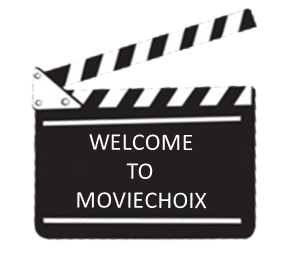

In [ ]:
#@title Enter your film title (English) { vertical-output: true }
my_film = "Finding Nemo" #@param {type:"string"}


In [ ]:
#@title Saissisez titre en français
my_film_fr = "" #@param {type:"string"}


# SPOILER ! SECRET INSIDE...

In [ ]:
#@title Import libraries
from IPython.core import display as ICD

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [ ]:
#@title Import data
# Over 5000 votes for English, over 500 for French


df = pd.read_csv('https://github.com/BenTapscott/WCS_project_2/blob/main/dataframe_english_french_movies_final.csv?raw=true')

In [ ]:
#@title Define KNN model
X = df.iloc[:,16:]
y = df['votes']
model_knn = KNeighborsClassifier(10)
model_knn.fit(X, y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

# PLEASE FIND BELOW THE RECOMMENDED MOVIES


In [ ]:
#@title You should like the following movies

if my_film:

  my_film = my_film.lower()
  my_film_genres = df.loc[(df['original_title_lower'] == (my_film))].to_numpy()

  my_film_genres = my_film_genres[:,16:]

  my_film_neighours = model_knn.kneighbors(my_film_genres)

  dataA = []
  dataB = []
  dataC = []

  for x in my_film_neighours[1]:
    dataA.append(df['original_title'].iloc[x])
    dataB.append(df['description'].iloc[x])
    dataC.append(df['french title'].iloc[x])

  df_output=pd.DataFrame(dataA).T
  df_output2=pd.DataFrame(dataC).T
  df_output3=pd.DataFrame(dataB).T
  pd.set_option('max_colwidth', 200)

  print(ICD.display(pd.concat([df_output,df_output2,df_output3],axis=1)))

elif my_film_fr:

  my_film_fr = my_film_fr.lower()

  my_film_genres = df.loc[(df['french_title_lower'] == (my_film_fr))].to_numpy()

  my_film_genres = my_film_genres[:,16:]

  my_film_neighours = model_knn.kneighbors(my_film_genres)

  dataA = []
  dataB = []
  dataC = []

  for x in my_film_neighours[1]:
    dataA.append(df['original_title'].iloc[x])
    dataB.append(df['description'].iloc[x])
    dataC.append(df['french title'].iloc[x])

  df_output=pd.DataFrame(dataA).T
  df_output2=pd.DataFrame(dataC).T
  df_output3=pd.DataFrame(dataB).T
  pd.set_option('max_colwidth', 200)

  print(ICD.display(pd.concat([df_output,df_output2,df_output3],axis=1)))

else:
  print('There was no input')


,original_title,french title,description
6087,Finding Nemo,Le Monde de Nemo,"After his son is captured in the Great Barrier Reef and taken to Sydney, a timid clownfish sets out on a journey to bring him home."
6886,Happy Feet,Happy Feet,"Into the world of the Emperor Penguins, who find their soul mates through song, a penguin is born who cannot sing. But he can tap dance something fierce!"
7144,Bee Movie,Bee Movie - Drôle d'abeille,"Barry B. Benson, a bee just graduated from college, is disillusioned at his lone career choice: making honey. On a special trip outside the hive, Barry's life is saved by Vanessa, a florist in New..."
9637,Happy Feet Two,Happy Feet 2,"Mumble's son, Erik, is struggling to realize his talents in the Emperor Penguin world. Meanwhile, Mumble and his family and friends discover a new threat their home -- one that will take everyone ..."
10899,Inside Out,Vice-versa,"After young Riley is uprooted from her Midwest life and moved to San Francisco, her emotions - Joy, Fear, Anger, Disgust and Sadness - conflict on how best to navigate a new city, house, and school."
11655,Zootopia,Zootopie,"In a city of anthropomorphic animals, a rookie bunny cop and a cynical con artist fox must work together to uncover a conspiracy."
7070,Ratatouille,Ratatouille,A rat who can cook makes an unusual alliance with a young kitchen worker at a famous restaurant.
3803,Aladdin,Aladdin,A kindhearted street urchin and a power-hungry Grand Vizier vie for a magic lamp that has the power to make their deepest wishes come true.
8816,Up,Là-haut,"78-year-old Carl Fredricksen travels to Paradise Falls in his house equipped with balloons, inadvertently taking a young stowaway."
5631,"Monsters, Inc.",Monstres & Cie,"In order to power the city, monsters have to scare children so that they scream. However, the children are toxic to the monsters, and after a child gets through, 2 monsters realize things may not ..."


None
